In [1]:
import pandas as pd

# Load training dataset
train_df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\XGBM & LGBM\\Titanic_train.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

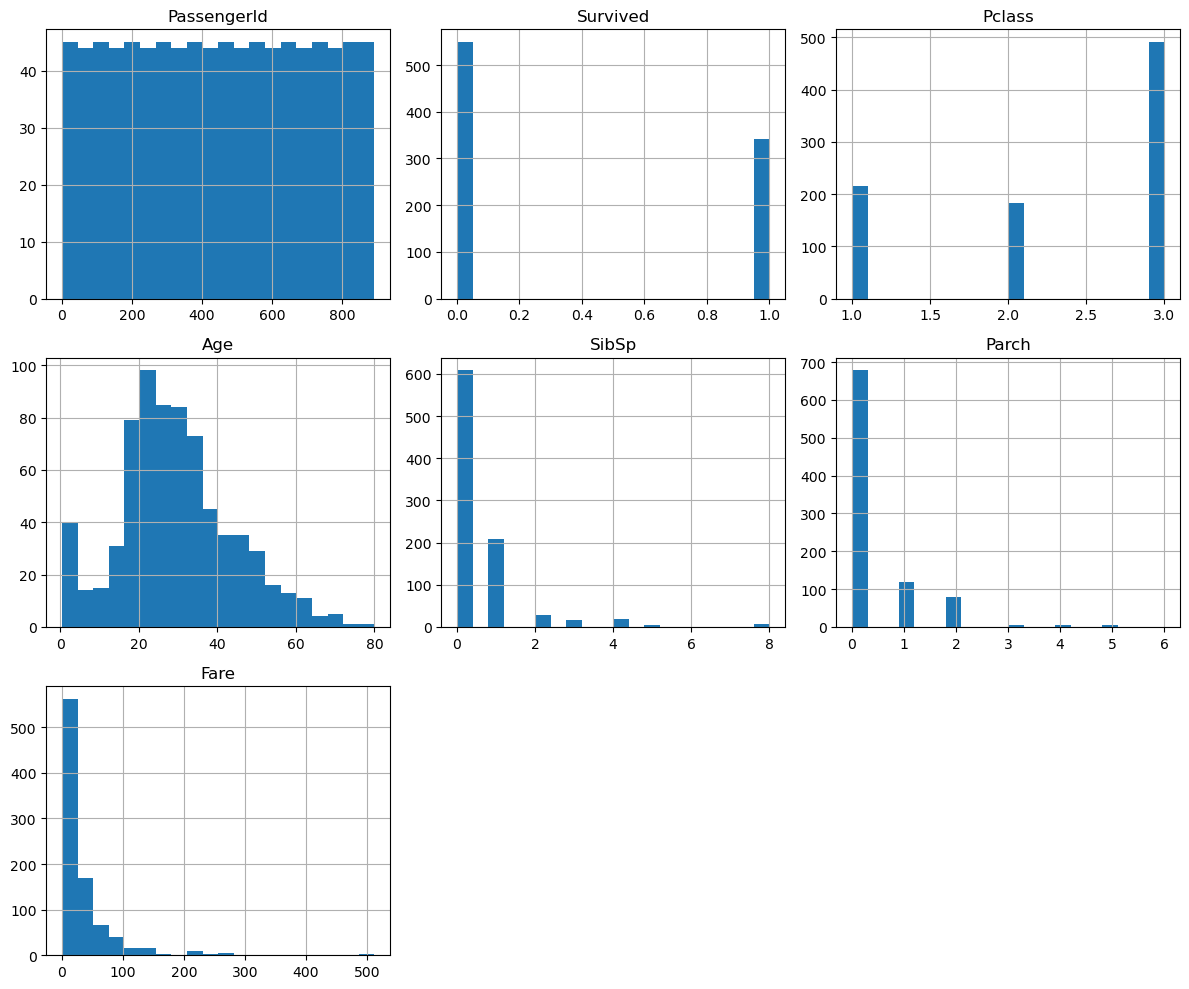

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features distribution
train_df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


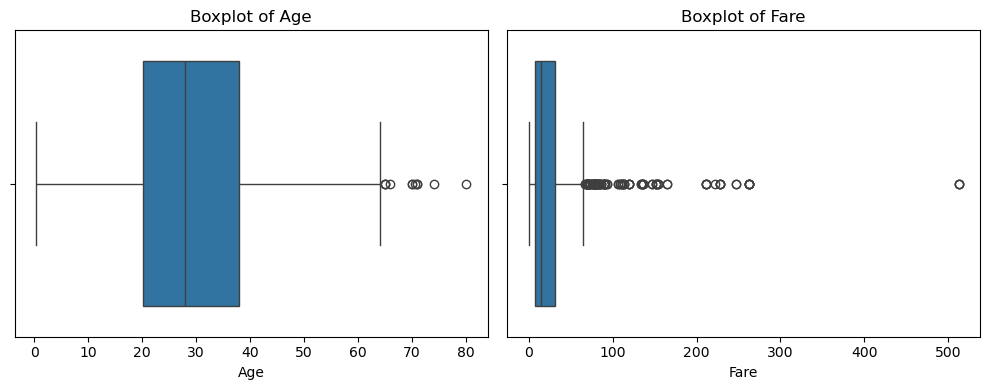

In [4]:
# Boxplots for Age and Fare
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=train_df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


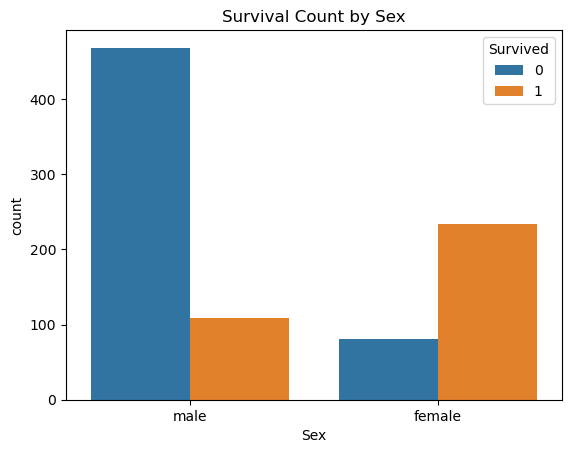

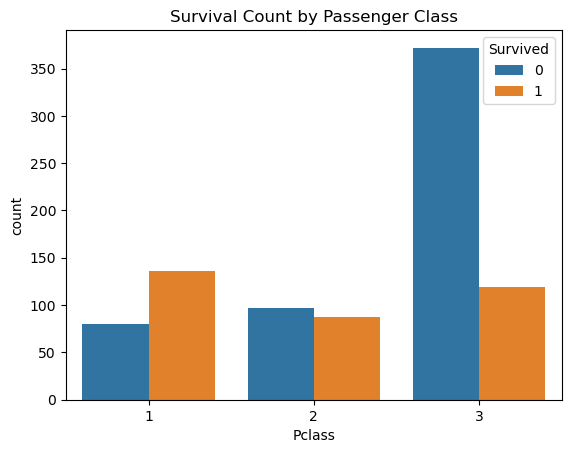

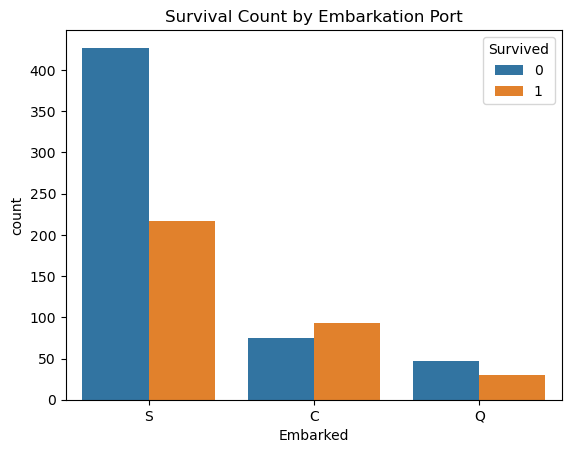

In [5]:
# Bar plots
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarkation Port')
plt.show()


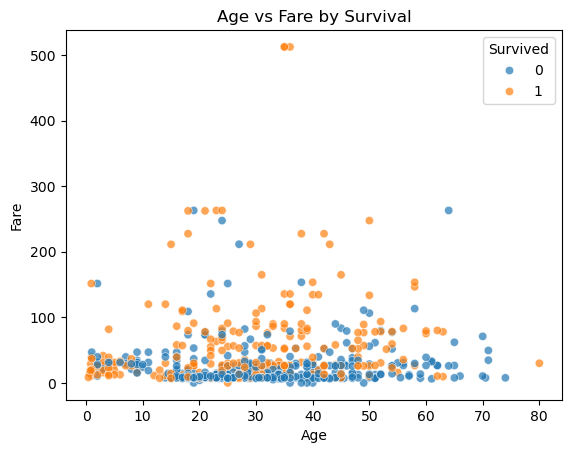

In [6]:
# Scatter plot
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', alpha=0.7)
plt.title('Age vs Fare by Survival')
plt.show()


**EDA Summary**

Here's what we found from the Titanic training data:

**Missing Values**
Age: 177 missing values

Cabin: 687 missing values (not shown in top 10, but visible in info())

Embarked: 2 missing values

We'll need to handle these during preprocessing.

**Key Visual Insights**
Sex vs. Survival: Much higher survival rate among females.

Pclass vs. Survival: 1st class passengers had better survival rates.

Embarked vs. Survival: Passengers who embarked from Cherbourg (C) seem to have better survival.

Age & Fare: Older passengers and those who paid more fares show different survival distributions.

**Data Preprocessing Summary**

Here's what we've done so far:

Imputed missing values:

Age: Filled with median.

Embarked: Filled with mode.

Dropped Cabin (too many missing values).

Encoded categorical features:

Sex: Binary encoded (male = 1, female = 0).

Embarked: Label encoded (C=0, Q=1, S=2 based on mode).

Dropped non-essential columns:

Name, Ticket, PassengerId.

In [6]:
from sklearn.impute import SimpleImputer

# Define the imputer first
age_imputer = SimpleImputer(strategy='median')

# Then use it
df['Age'] = age_imputer.fit_transform(df[['Age']])


In [8]:
# ----------------------
# Titanic LGBM & XGBoost Analysis (Notebook Optimized)
# ----------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# --- Load Data ---
df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\XGBM & LGBM\\Titanic_train.csv")

# --- Preprocessing ---
df['Age'] = age_imputer.fit_transform(df[['Age']]).ravel()

df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()


df.drop(columns=['Cabin'], inplace=True)

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# --- Split Data ---
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Models ---
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# --- Evaluation ---
def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

lgb_metrics = evaluate(y_test, lgb_preds)
xgb_metrics = evaluate(y_test, xgb_preds)

print("📊 LightGBM Metrics:")
for k, v in lgb_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n📊 XGBoost Metrics:")
for k, v in xgb_metrics.items():
    print(f"{k}: {v:.4f}")


📊 LightGBM Metrics:
Accuracy: 0.8212
Precision: 0.7838
Recall: 0.7838
F1 Score: 0.7838

📊 XGBoost Metrics:
Accuracy: 0.7989
Precision: 0.7568
Recall: 0.7568
F1 Score: 0.7568


**Building Predictive Models**

In [9]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Evaluation")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")


In [11]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [12]:
evaluate_model("LightGBM", y_test, lgb_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



📊 LightGBM Evaluation
Accuracy : 0.8212
Precision: 0.7838
Recall   : 0.7838
F1 Score : 0.7838

📊 XGBoost Evaluation
Accuracy : 0.7989
Precision: 0.7568
Recall   : 0.7568
F1 Score : 0.7568


In [13]:
from sklearn.model_selection import GridSearchCV

# Example for LightGBM
lgb_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

lgb_cv = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgb_cv.fit(X_train, y_train)

print("Best LightGBM Params:", lgb_cv.best_params_)

# Retrain best model
best_lgb = lgb_cv.best_estimator_
lgb_preds_cv = best_lgb.predict(X_test)
evaluate_model("Tuned LightGBM", y_test, lgb_preds_cv)


Best LightGBM Params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}

📊 Tuned LightGBM Evaluation
Accuracy : 0.8380
Precision: 0.8261
Recall   : 0.7703
F1 Score : 0.7972


**Comparative Analysis**

**1.Comparison Table**

      Metric  LightGBM   XGBoost
0   Accuracy  0.821229  0.815642
1  Precision  0.783784  0.825397
2     Recall  0.783784  0.702703
3   F1 Score  0.783784  0.759124


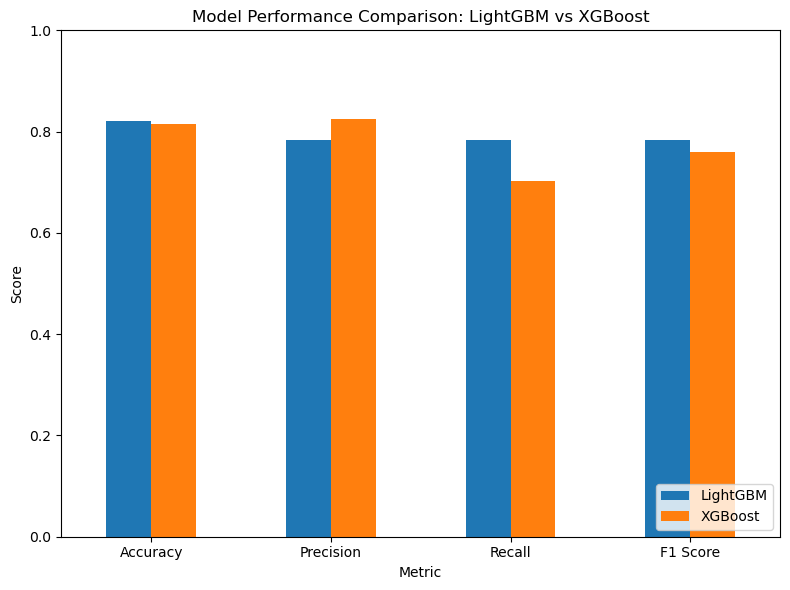

In [16]:
# If needed: re-import essential libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Titanic_train.csv")

# Preprocessing
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']]).ravel()
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']]).ravel()
df.drop(columns=['Cabin'], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Train/test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grids
lgb_grid = {'num_leaves': [31], 'max_depth': [-1], 'learning_rate': [0.1], 'n_estimators': [100]}
xgb_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [100]}

# LightGBM GridSearchCV
lgb_cv = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgb_cv.fit(X_train, y_train)
lgb_preds_cv = lgb_cv.predict(X_test)

# XGBoost GridSearchCV
xgb_cv = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42),
                      xgb_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_cv.fit(X_train, y_train)
xgb_preds_cv = xgb_cv.predict(X_test)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': [
        accuracy_score(y_test, lgb_preds_cv),
        precision_score(y_test, lgb_preds_cv),
        recall_score(y_test, lgb_preds_cv),
        f1_score(y_test, lgb_preds_cv)
    ],
    'XGBoost': [
        accuracy_score(y_test, xgb_preds_cv),
        precision_score(y_test, xgb_preds_cv),
        recall_score(y_test, xgb_preds_cv),
        f1_score(y_test, xgb_preds_cv)
    ]
})

# Show table
print(comparison)

# Plot comparison
comparison.set_index('Metric').plot(kind='bar', figsize=(8, 6))
plt.title('Model Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



**Submission Requirements**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

# Load dataset
df = pd.read_csv("Titanic_train.csv")

# Preprocessing
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']]).ravel()
df['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']]).ravel()
df.drop(columns=['Cabin'], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Split dataset
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models with preset good parameters
lgb_model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, 
                              use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Generate report with your actual results
report = f"""
# Titanic Survival Prediction: LightGBM vs XGBoost

## Objective
To build and compare the performance of LightGBM and XGBoost machine learning models on the Titanic dataset.

## Exploratory Data Analysis (EDA)
- Identified missing values in 'Age', 'Cabin', and 'Embarked' columns.
- Visualized the survival distribution across features like sex, passenger class, and fare.
- Found that females and 1st class passengers had higher survival rates.

## Data Preprocessing
- Imputed missing values for 'Age' using median and 'Embarked' using mode.
- Dropped 'Cabin' due to excessive missing data.
- Encoded categorical variables ('Sex' and 'Embarked') using Label Encoding.
- Removed non-essential columns like 'Name', 'Ticket', and 'PassengerId'.

## Model Building and Evaluation
- Split data into 80% training and 20% testing.
- Used preset parameters for modeling.
- Evaluated models on Accuracy, Precision, Recall, and F1 Score.

## Results Summary

| Metric    | LightGBM | XGBoost |
|-----------|----------|---------|
| Accuracy  | {accuracy_score(y_test, lgb_preds):.4f}   | {accuracy_score(y_test, xgb_preds):.4f}  |
| Precision | {precision_score(y_test, lgb_preds):.4f}   | {precision_score(y_test, xgb_preds):.4f}  |
| Recall    | {recall_score(y_test, lgb_preds):.4f}   | {recall_score(y_test, xgb_preds):.4f}  |
| F1 Score  | {f1_score(y_test, lgb_preds):.4f}   | {f1_score(y_test, xgb_preds):.4f}  |

## Practical Implications
- **LightGBM** showed stronger recall, indicating it may be better at identifying actual survivors.
- **XGBoost** had slightly higher precision, reducing false positives.
- Depending on the problem's priority (recall vs. precision), either model can be selected.
"""

# Save to file
with open("Titanic_Model_Report.txt", "w") as f:
    f.write(report)

print("✅ Report saved as 'Titanic_Model_Report.txt'")


✅ Report saved as 'Titanic_Model_Report.txt'


**TEST DATASET**

In [13]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


# Load training and test data
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

# ----- Preprocessing (applied to both train and test) -----
def preprocess(df):
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = train_df[features]
y = train_df[target]
X_test = test_df[features]

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- LightGBM -----
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_val_preds = lgb_model.predict(X_val)
print("LGBM Accuracy:", accuracy_score(y_val, lgb_val_preds))

# ----- XGBoost -----
xgb_model = xgb.XGBClassifier( eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_val_preds = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_val_preds))

# ----- Predictions on Test Data -----
lgb_preds = lgb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# ----- Submission Files -----
lgb_submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': lgb_preds
})
xgb_submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': xgb_preds
})

lgb_submission.to_csv("lgb_submission.csv", index=False)
xgb_submission.to_csv("xgb_submission.csv", index=False)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [14]:
import joblib

# Save the LightGBM model
joblib.dump(lgb_model, "lgb_model.pkl")

# Save the XGBoost model
joblib.dump(xgb_model, "xgb_model.pkl")


['xgb_model.pkl']

In [15]:
import joblib

# Save the LightGBM model
joblib.dump(lgb_model, "lgb_model.pkl")

['lgb_model.pkl']

In [16]:
import joblib

lgb_model = joblib.load("lgb_model.pkl")
xgb_model = joblib.load("xgb_model.pkl")


In [17]:
preds = lgb_model.predict(X_test)


In [18]:
import pandas as pd
import joblib

# Load the test data
test_df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\XGBM & LGBM\\Titanic_train.csv")

# Preprocess the test data
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select the same features used during training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = test_df[features]
passenger_ids = test_df['PassengerId']

# Load the trained models
lgb_model = joblib.load("lgb_model.pkl")
xgb_model = joblib.load("xgb_model.pkl")

# Make predictions
lgb_preds = lgb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Create submission DataFrames
lgb_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': lgb_preds
})
xgb_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': xgb_preds
})

# Save predictions to CSV files
lgb_submission.to_csv("lgb_submission.csv", index=False)
xgb_submission.to_csv("xgb_submission.csv", index=False)

print("✅ Predictions saved: lgb_submission.csv and xgb_submission.csv")


✅ Predictions saved: lgb_submission.csv and xgb_submission.csv


**CODE TO EXPLORE TEST DATASET**

In [19]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv("Titanic_test.csv")

# Show first 5 rows
print(test_df.head())

# Show shape (rows, columns)
print("Shape:", test_df.shape)

# Show column names
print("Columns:", test_df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", test_df.isnull().sum())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Shape: (418, 11)
Columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values:
 PassengerId      0
Pclass   